In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import corner
import time

In [2]:
# Solar Abundances
marcs2014_a_x_sun = dict()
elements = [
 "H",  "He",  "Li",  "Be",   "B",   "C",   "N",   "O",   "F",  "Ne",
"Na",  "Mg",  "Al",  "Si",   "P",   "S",  "Cl",  "Ar",   "K",  "Ca",
"Sc",  "Ti",   "V",  "Cr",  "Mn",  "Fe",  "Co",  "Ni",  "Cu",  "Zn",
"Ga",  "Ge",  "As",  "Se",  "Br",  "Kr",  "Rb",  "Sr",   "Y",  "Zr",
"Nb",  "Mo",  "Tc",  "Ru",  "Rh",  "Pd",  "Ag",  "Cd",  "In",  "Sn",
"Sb",  "Te",   "I",  "Xe",  "Cs",  "Ba",  "La",  "Ce",  "Pr",  "Nd",
"Pm",  "Sm",  "Eu",  "Gd",  "Tb",  "Dy",  "Ho",  "Er",  "Tm",  "Yb",
"Lu",  "Hf",  "Ta",   "W",  "Re",  "Os",  "Ir",  "Pt",  "Au",  "Hg",
"Tl",  "Pb",  "Bi",  "Po",  "At",  "Rn",  "Fr",  "Ra",  "Ac",  "Th",
"Pa",   "U",  "Np",  "Pu",  "Am",  "Cm",  "Bk",  "Cs",  "Es"
]
zeropoints = [
12.00, 10.93,  1.05,  1.38,  2.70,  8.39,  7.78,  8.66,  4.56,  7.84,
 6.17,  7.53,  6.37,  7.51,  5.36,  7.14,  5.50,  6.18,  5.08,  6.31,
 3.17,  4.90,  4.00,  5.64,  5.39,  7.45,  4.92,  6.23,  4.21,  4.60,
 2.88,  3.58,  2.29,  3.33,  2.56,  3.25,  2.60,  2.92,  2.21,  2.58,
 1.42,  1.92, -8.00,  1.84,  1.12,  1.66,  0.94,  1.77,  1.60,  2.00,
 1.00,  2.19,  1.51,  2.24,  1.07,  2.17,  1.13,  1.70,  0.58,  1.45,
-8.00,  1.00,  0.52,  1.11,  0.28,  1.14,  0.51,  0.93,  0.00,  1.08,
 0.06,  0.88, -0.17,  1.11,  0.23,  1.25,  1.38,  1.64,  1.01,  1.13,
 0.90,  2.00,  0.65, -8.00, -8.00, -8.00, -8.00, -8.00, -8.00,  0.06,
-8.00, -0.52, -8.00, -8.00, -8.00, -8.00, -8.00, -8.00, -8.00]
for (element, zeropoint) in zip(elements, zeropoints):
    marcs2014_a_x_sun[element] = zeropoint

In [3]:
dates = np.concatenate((glob.glob('1*'),glob.glob('2*')))
dates = [date[-6:] for date in dates]
dates.sort()
print(dates)

['131216', '131217', '131220', '140111', '140112', '140113', '140114', '140115', '140116', '140117', '140118', '140209', '140303', '140304', '140305', '140307', '140308', '140309', '140310', '140312', '140313', '140314', '140315', '140316', '140409', '140412', '140413', '140414', '140607', '140608', '140609', '140610', '140611', '140707', '140708', '140709', '140710', '140711', '140713', '140805', '140806', '140807', '140808', '140809', '140810', '140811', '140812', '140813', '140814', '140823', '140824', '141031', '141102', '141103', '141104', '141202', '141231', '150101', '150102', '150103', '150105', '150106', '150107', '150108', '150109', '150112', '150204', '150205', '150206', '150207', '150208', '150209', '150210', '150211', '150330', '150401', '150405', '150406', '150407', '150408', '150409', '150410', '150411', '150412', '150413', '150426', '150427', '150428', '150429', '150430', '150504', '150531', '150601', '150602', '150603', '150604', '150605', '150703', '150704', '150705',

In [4]:
def combine_daily_results(date):
    """
    This function is combining the results for each date
    """
    
    print(date)

    index = 0
    date_products = glob.glob(date+'/*/*_simple_fit_results.fits')
    date_products.sort()
    for one_product in date_products:
        new_table = Table.read(one_product)
        new_table['tmass_id'] = str(new_table['tmass_id'][0])
        if np.isfinite(new_table['gaia_edr3_source_id'][0]):
            new_table['gaia_edr3_source_id'] = int(new_table['gaia_edr3_source_id'][0])
        else:
            new_table['gaia_edr3_source_id'] = int(-1)
        if index == 0:
            data = dict()
            for label in new_table.keys():
                data[label] = []
        for label in new_table.keys():
            data[label].append(new_table[label])
        index += 1
    data['gaia_edr3_source_id'] = [int(x) for x in data['gaia_edr3_source_id']]

    for label in data.keys():
        data[label] = np.array(data[label])
    data = Table(data)


    data.write('daily/galah_dr4_allspec_not_validated_'+str(date)+'.fits',overwrite=True)
    
for date in dates:
    combine_daily_results(date)

131216
131217
131220
140111
140112
140113
140114
140115
140116
140117
140118
140209
140303
140304
140305
140307
140308
140309
140310
140312
140313
140314
140315
140316
140409
140412
140413
140414
140607
140608
140609
140610
140611
140707
140708
140709
140710
140711
140713
140805
140806
140807
140808
140809
140810
140811
140812
140813
140814
140823
140824
141031
141102
141103
141104
141202
141231
150101
150102
150103
150105
150106
150107
150108
150109
150112
150204
150205
150206
150207
150208
150209
150210
150211
150330
150401
150405
150406
150407
150408
150409
150410
150411
150412
150413
150426
150427
150428
150429
150430
150504
150531
150601
150602
150603
150604
150605
150703
150704
150705
150706
150718
150824
150826
150827
150828
150829
150830
150831
150901
150902
150903
151008
151009
151109
151110
151111
151219
151220
151223
151225
151226
151227
151228
151229
151230
151231
160106
160107
160108
160109
160110
160111
160112
160113
160123
160124
160125
160126
160129
160130
160325
160326

In [25]:
def combine_dates(dates):
    
    data = Table.read('daily/galah_dr4_allspec_not_validated_'+str(dates[0])+'.fits')
    
    for date in dates[1:]:
        data_next = Table.read('daily/galah_dr4_allspec_not_validated_'+str(date)+'.fits')
        data = vstack([data, data_next])
    data['tmass_id'] = np.array(data['tmass_id'],dtype=str)

    return(data)

data = combine_dates(dates)

In [26]:
# Apply global offset
# Grevesse, Asplund & Sauval 2007, Space Sciences Review 130, 105
data['teff']  += 5772.0 - 5770.6
data['logg']  += 4.438 - 4.339 # DR3: offset without non-spectroscopic information
data['fe_h']  += marcs2014_a_x_sun['Fe'] - (7.45-0.070)  # -0.017 VESTA, GAS07: 7.45, DR3: 7.38
data['li_fe'] += marcs2014_a_x_sun['Li'] - (1.05+0.250) # +0.543 VESTA, GAS07: 1.05, DR3: 1.05
data['c_fe']  += marcs2014_a_x_sun['C']  - (8.39+0.035) # VESTA, GAS07: 8.39, DR3: 8.45
data['n_fe']  += marcs2014_a_x_sun['N']  - (7.78+0.150)  # VESTA: 7.78+0.617, GAS07: 7.78, DR3:
data['o_fe']  += marcs2014_a_x_sun['O']  - (8.66+0.070) # -0.124 VESTA, GAS07: 8.66, DR3: 8.77
data['na_fe'] += marcs2014_a_x_sun['Na'] - (6.17+0.204) # VESTA, GAS07: 6.17, DR3: 6.06
data['mg_fe'] += marcs2014_a_x_sun['Mg'] - (7.53+0.082) # +0.164 VESTA, GAS07: 7.53, DR3: 7.60
data['al_fe'] += marcs2014_a_x_sun['Al'] - (6.37+0.205) # VESTA, GAS07: 6.37, DR3: 6.41
data['si_fe'] += marcs2014_a_x_sun['Si'] - (7.51+0.009) # VESTA, GAS07: 7.51, DR3: 7.47
data['k_fe']  += marcs2014_a_x_sun['K']  - (5.08-0.029) # VESTA, GAS07: 5.08, DR3: 5.07
data['ca_fe'] += marcs2014_a_x_sun['Ca'] - (6.31+0.035) # VESTA, GAS07: 6.31, DR3: 6.18
data['sc_fe'] += marcs2014_a_x_sun['Sc'] - (3.17-0.016) # VESTA, GAS07: 3.17, DR3:
data['ti_fe'] += marcs2014_a_x_sun['Ti'] - (4.90+0.010) # VESTA, GAS07: 4.90, DR3:
data['v_fe']  += marcs2014_a_x_sun['V']  - (4.00-0.116) # VESTA, GAS07: 4.00, DR3:
data['cr_fe'] += marcs2014_a_x_sun['Cr'] - (5.64+0.014) # VESTA, GAS07: 5.64, DR3: 0.132
data['mn_fe'] += marcs2014_a_x_sun['Mn'] - (5.39+0.135) # VESTA, GAS07: 5.39, DR3: 0.064
data['co_fe'] += marcs2014_a_x_sun['Co'] - (4.92-0.095) # VESTA, GAS07: 4.92, DR3: 0.072
data['ni_fe'] += marcs2014_a_x_sun['Ni'] - (6.23+0.016) # VESTA, GAS07: 6.23, DR3: 6.23
data['cu_fe'] += marcs2014_a_x_sun['Cu'] - (4.21-0.154) # VESTA, GAS07: 4.21, DR3: 4.06
data['zn_fe'] += marcs2014_a_x_sun['Zn'] - (4.60-0.050) # VESTA, GAS07: 4.60, DR3:
data['rb_fe'] += marcs2014_a_x_sun['Rb'] - (2.60) # GAS07: 2.60, DR3: 2.60
data['sr_fe'] += marcs2014_a_x_sun['Sr'] - (2.92) # GAS07: 2.92, DR3: 3.30
data['y_fe']  += marcs2014_a_x_sun['Y']  - (2.21-0.115) # VESTA, GAS07: 2.21, DR3: 2.14
data['zr_fe'] += marcs2014_a_x_sun['Zr'] - (2.58-0.297) # VESTA, GAS07: 2.58, DR3:
data['mo_fe'] += marcs2014_a_x_sun['Mo'] - (1.92) # GAS07: 1.92, DR3:
data['ru_fe'] += marcs2014_a_x_sun['Ru'] - (1.84) # GAS07: 1.84, DR3: 2.31
data['ba_fe'] += marcs2014_a_x_sun['Ba'] - (2.17-0.067) # VESTA, GAS07: 2.17, DR3: 2.17
data['la_fe'] += marcs2014_a_x_sun['La'] - (1.13) # GAS07: 1.13, DR3:
data['ce_fe'] += marcs2014_a_x_sun['Ce'] - (1.70) # GAS07: 1.70, DR3: 2.14
data['nd_fe'] += marcs2014_a_x_sun['Nd'] - (1.45+0.137) # VESTA, GAS07: 1.45, DR3:
data['sm_fe'] += marcs2014_a_x_sun['Sm'] - (1.00+0.130) # GAS07: 1.00, DR3:
data['eu_fe'] += marcs2014_a_x_sun['Eu'] - (0.52) # GAS07: 0.52, DR3: 0.57

In [27]:
data

sobject_id,tmass_id [1],gaia_edr3_source_id,flag_sp,teff,cov_e_teff,logg,cov_e_logg,fe_h,cov_e_fe_h,flag_fe_h,vmic,cov_e_vmic,vsini,cov_e_vsini,li_fe,cov_e_li_fe,flag_li_fe,c_fe,cov_e_c_fe,flag_c_fe,n_fe,cov_e_n_fe,flag_n_fe,o_fe,cov_e_o_fe,flag_o_fe,na_fe,cov_e_na_fe,flag_na_fe,mg_fe,cov_e_mg_fe,flag_mg_fe,al_fe,cov_e_al_fe,flag_al_fe,si_fe,cov_e_si_fe,flag_si_fe,k_fe,cov_e_k_fe,flag_k_fe,ca_fe,cov_e_ca_fe,flag_ca_fe,sc_fe,cov_e_sc_fe,flag_sc_fe,ti_fe,cov_e_ti_fe,flag_ti_fe,v_fe,cov_e_v_fe,flag_v_fe,cr_fe,cov_e_cr_fe,flag_cr_fe,mn_fe,cov_e_mn_fe,flag_mn_fe,co_fe,cov_e_co_fe,flag_co_fe,ni_fe,cov_e_ni_fe,flag_ni_fe,cu_fe,cov_e_cu_fe,flag_cu_fe,zn_fe,cov_e_zn_fe,flag_zn_fe,rb_fe,cov_e_rb_fe,flag_rb_fe,sr_fe,cov_e_sr_fe,flag_sr_fe,y_fe,cov_e_y_fe,flag_y_fe,zr_fe,cov_e_zr_fe,flag_zr_fe,mo_fe,cov_e_mo_fe,flag_mo_fe,ru_fe,cov_e_ru_fe,flag_ru_fe,ba_fe,cov_e_ba_fe,flag_ba_fe,la_fe,cov_e_la_fe,flag_la_fe,ce_fe,cov_e_ce_fe,flag_ce_fe,nd_fe,cov_e_nd_fe,flag_nd_fe,sm_fe,cov_e_sm_fe,flag_sm_fe,eu_fe,cov_e_eu_fe,flag_eu_fe,model_name [1]
int64,str16,int64,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,float32,float32,int64,bytes15
131216001101086,05190213-5943123,4762640585441459456,0,4864.687,6.2677817,2.3919463,0.028416714,-0.24322522,0.0067366003,0,1.5535327,0.012510118,4.590657,0.061829217,-0.7391873,0.022868007,0,-0.00861712,0.018760417,0,0.0797074,0.015245795,0,0.12272888,0.057400566,0,0.13376912,0.025987262,0,0.06769262,0.015188533,0,0.2422268,0.021584956,0,0.025362503,0.010173753,0,-0.13421385,0.031780604,0,0.11660625,0.015850574,0,0.0258588,0.01502759,0,0.0632908,0.008376122,0,0.11136218,0.01002182,0,-0.028242273,0.008151952,0,-0.12846853,0.02016261,0,0.10084942,0.013950463,0,0.019394273,0.007558672,0,-0.057716906,0.024297336,0,-0.14029336,0.065292224,0,nan,nan,2,nan,nan,2,-0.18683013,0.03859095,0,-0.099796295,0.061554305,1,nan,nan,2,nan,nan,2,0.13484651,0.032415263,0,0.13521597,0.026329799,0,-0.26654252,0.045593046,1,0.049297363,0.016655143,0,0.027916595,0.02609802,0,0.84859455,0.085278615,0,5000_2.50_-0.25
131216001101087,05185485-5941119,4762640688520669312,0,5028.922,9.425846,2.3856275,0.032457966,-0.551921,0.008586914,0,1.5711193,0.017385967,6.6117992,0.07754731,-0.3049178,0.028179267,0,0.14691801,0.019487083,0,0.22206646,0.021002678,1,0.37934342,0.036178265,0,0.19750637,0.02748222,0,0.2940281,0.015050519,0,0.27534324,0.03488291,0,0.19654483,0.011978308,0,0.06961529,0.038027663,0,0.24427497,0.017619273,0,0.16929235,0.022347068,0,0.2529316,0.009921086,0,0.20488077,0.015084101,0,-0.01867285,0.012110389,0,-0.24950212,0.025256936,0,0.19453555,0.01813879,0,0.06254286,0.008501358,0,-0.08226286,0.028374467,0,0.28949633,0.07125298,0,nan,nan,2,nan,nan,2,-0.17864946,0.05839465,0,0.15804204,0.09661277,1,nan,nan,2,nan,nan,2,-0.17638563,0.038152047,0,0.1908139,0.039105877,1,-0.10303858,0.091573335,1,0.1311323,0.02114989,0,0.22932178,0.035038188,0,nan,nan,2,5000_2.50_-0.50
131216001101088,05185798-5946490,4762634435048463360,0,4502.295,4.741102,2.3451977,0.018829735,-0.26514578,0.0061177365,0,1.4122359,0.008436999,3.2312322,0.06508761,-1.106818,0.022604054,0,0.37147456,0.010210881,0,0.39075455,0.015121187,0,0.9821734,0.01650372,0,0.105422944,0.01942817,0,0.072462484,0.009981342,0,0.29011756,0.014993006,0,0.1541646,0.007371261,0,-0.14250758,0.0243672

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1543: RuntimeWarning: invalid value encountered in less_equal
  super().autoscale_None(np.ma.array(A, mask=(A <= 0)))


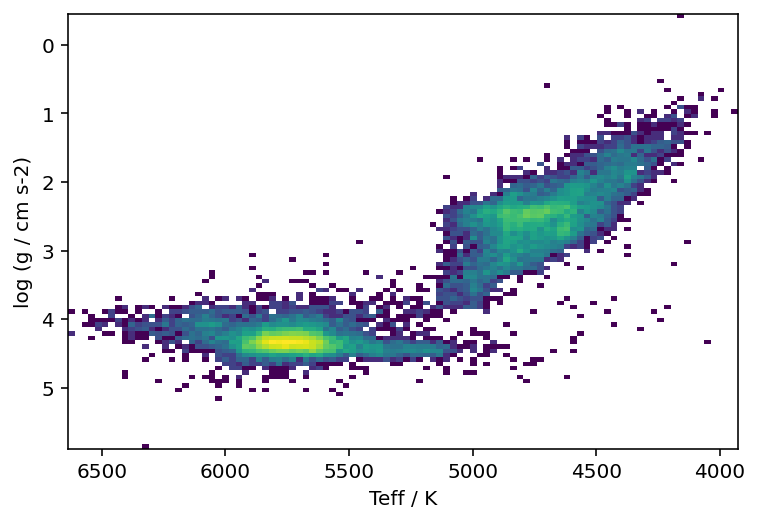

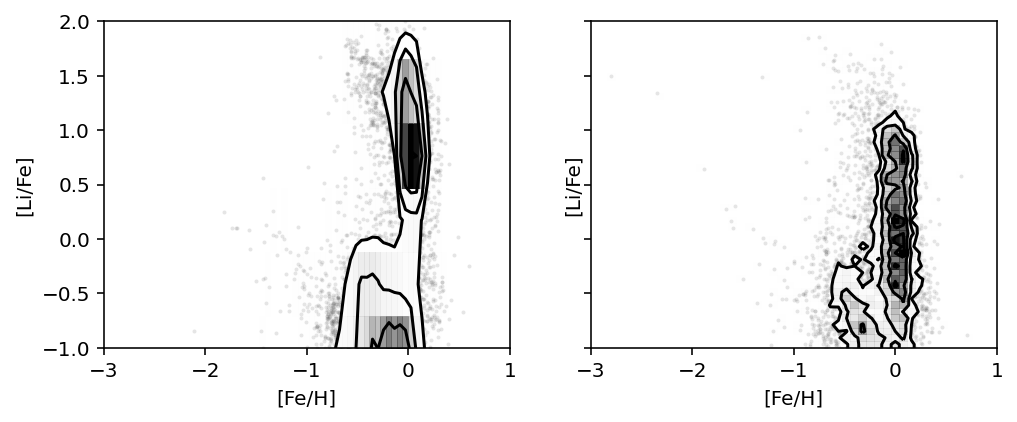

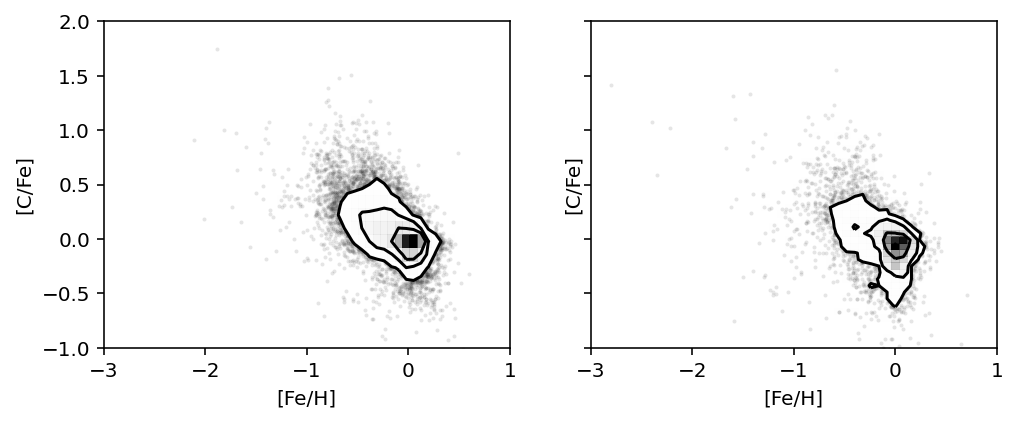

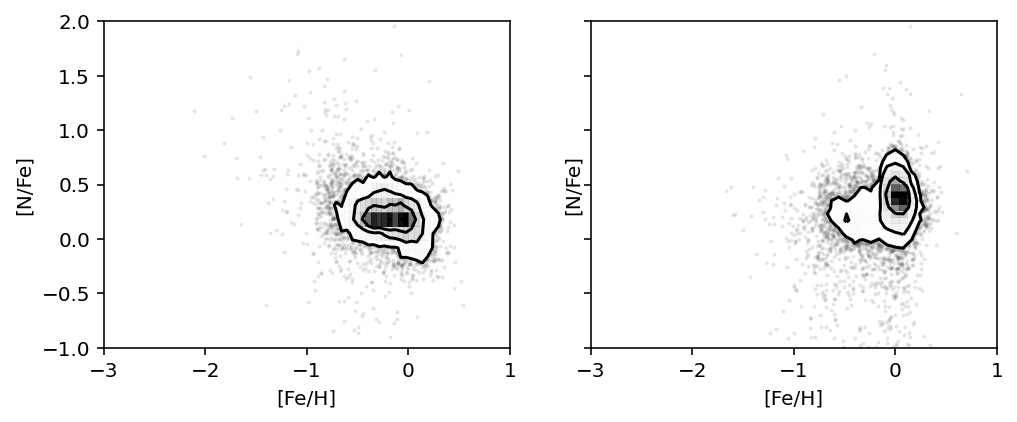

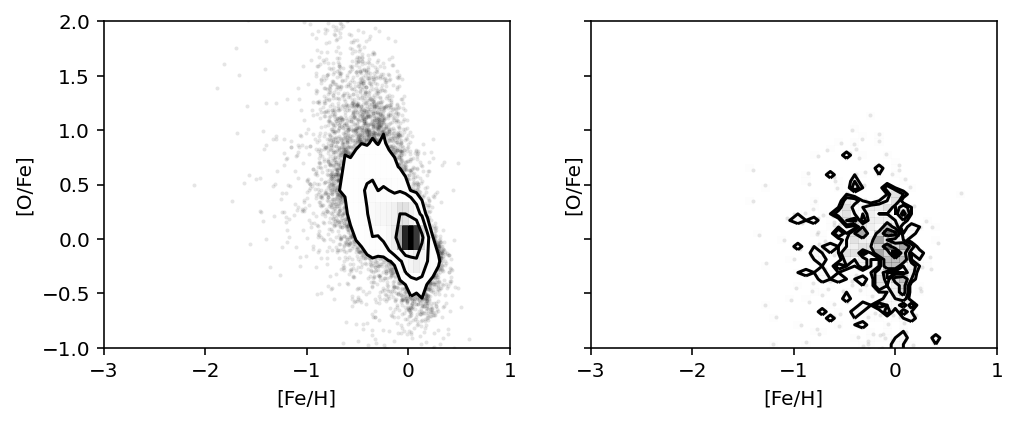

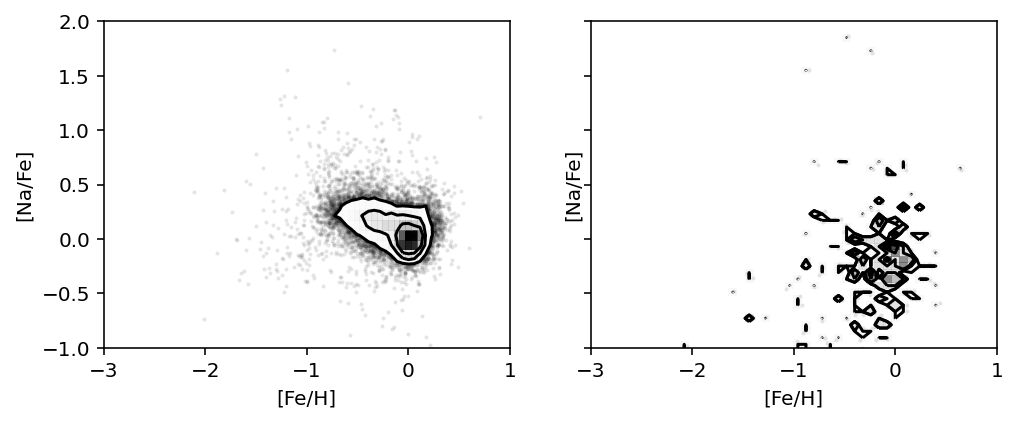

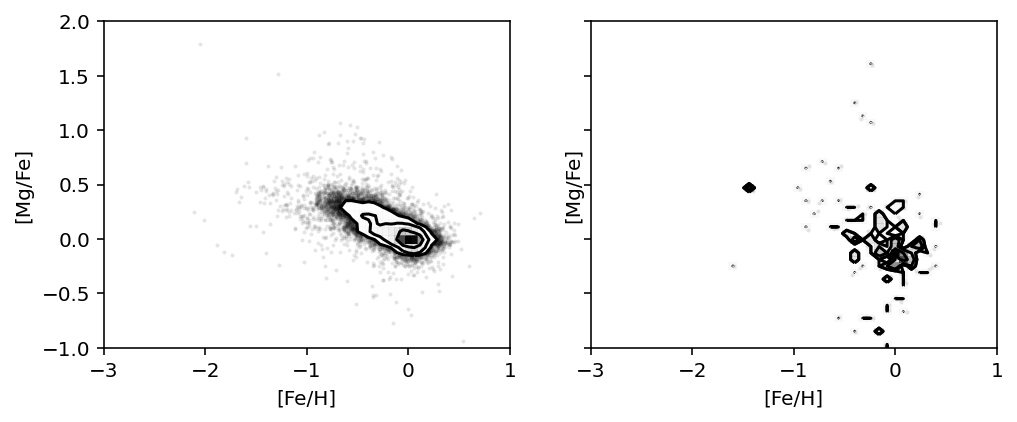

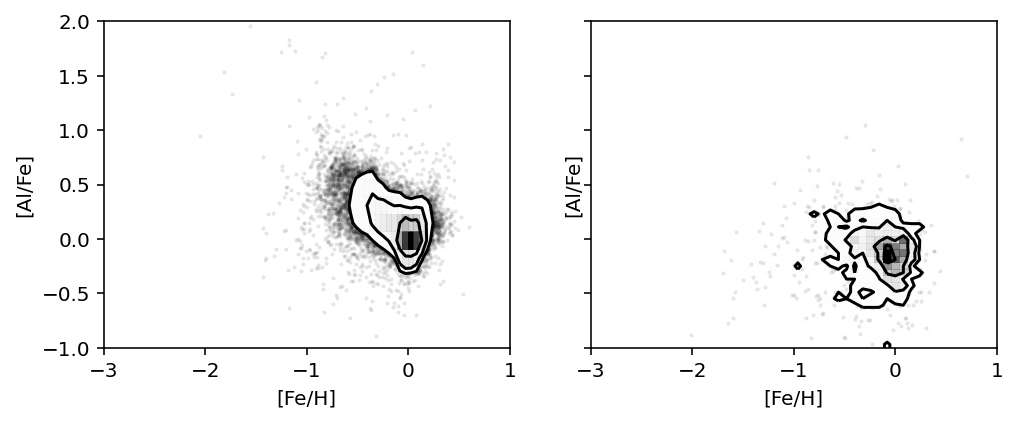

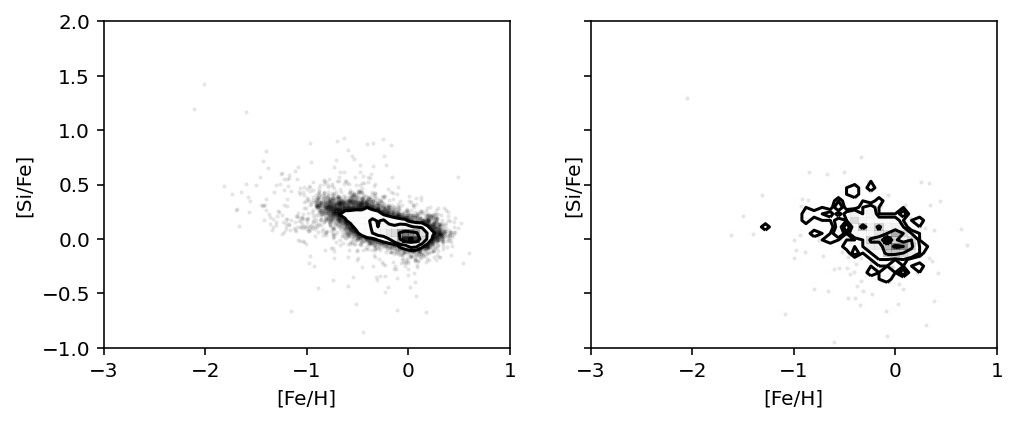

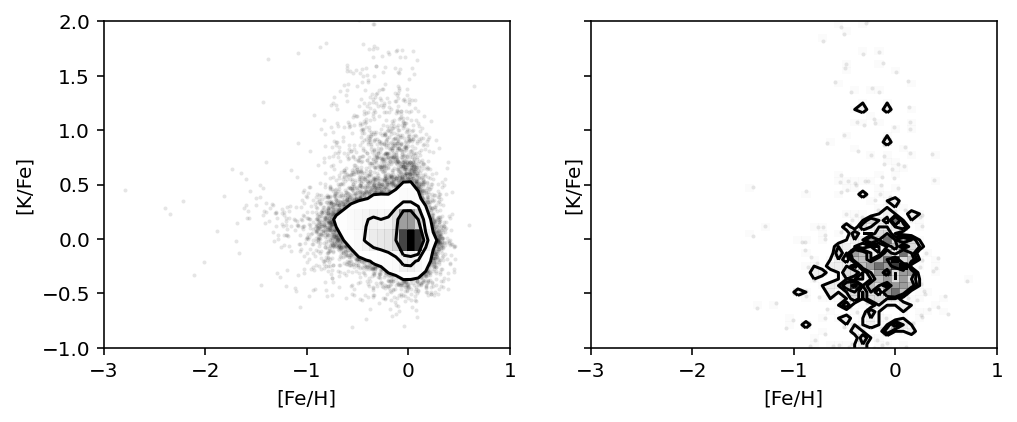

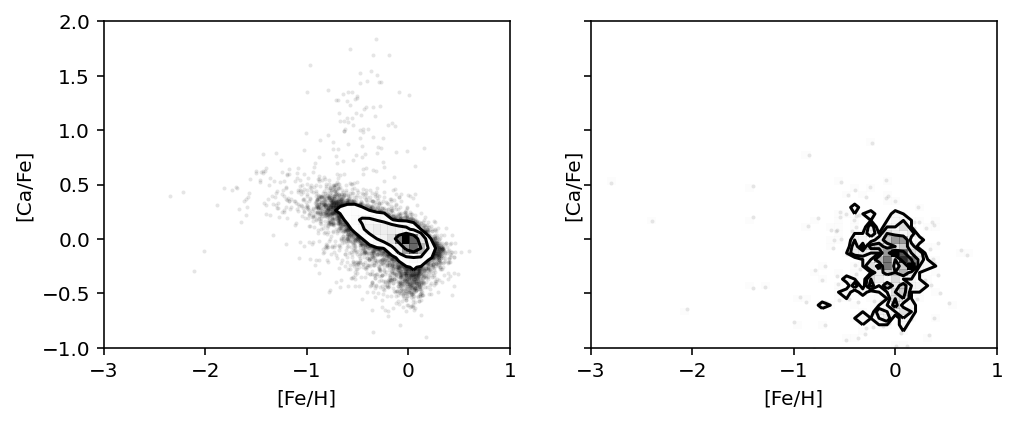

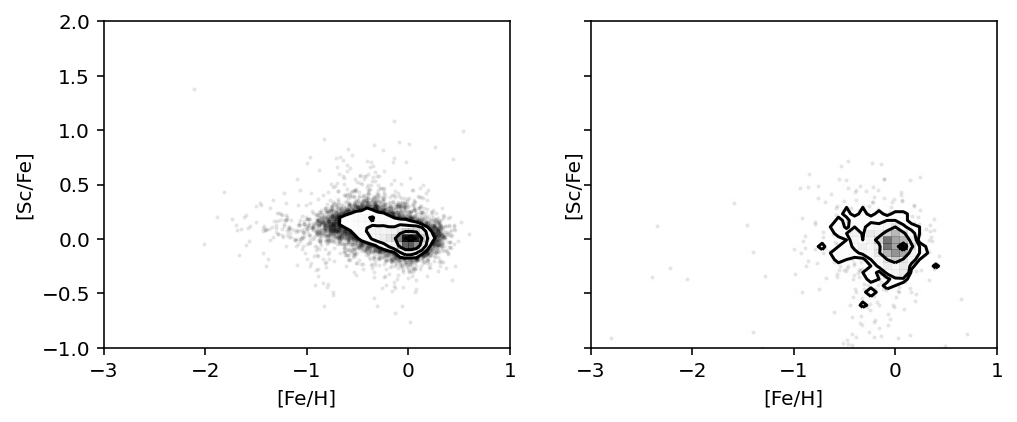

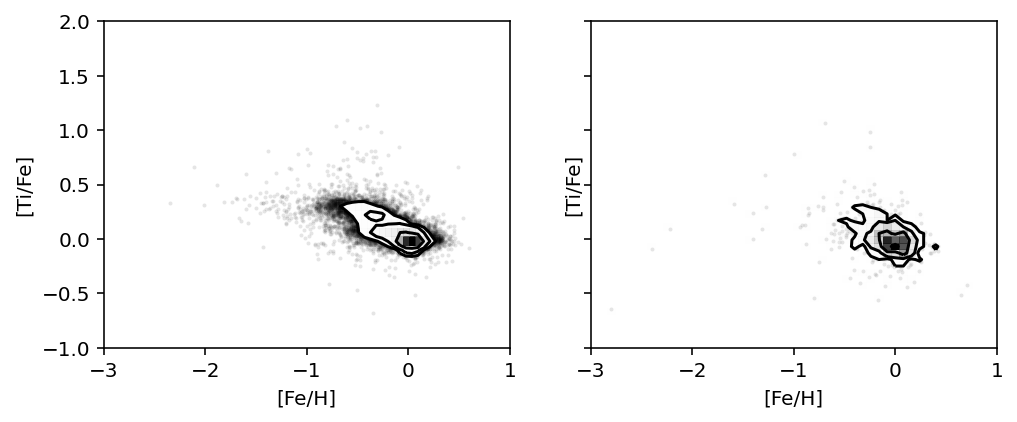

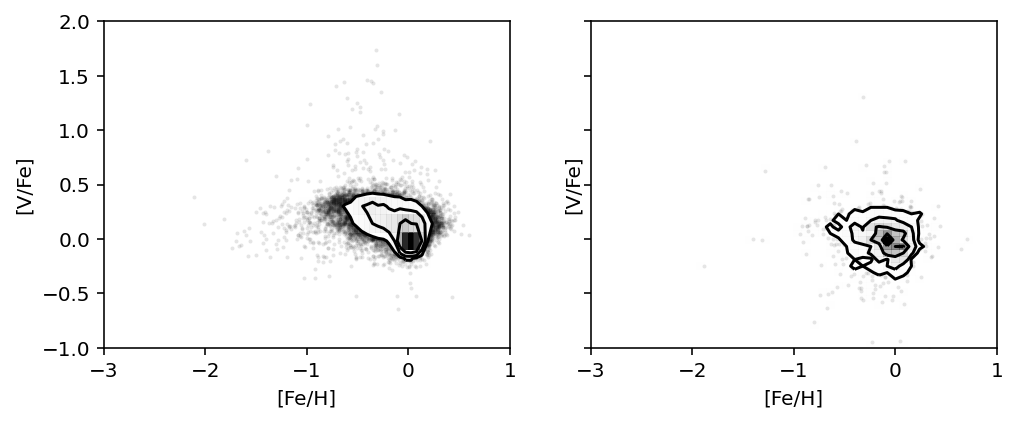

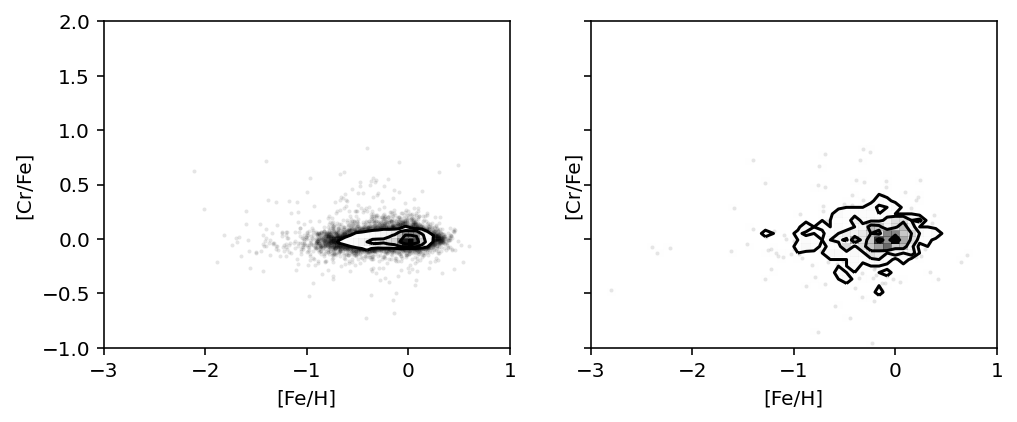

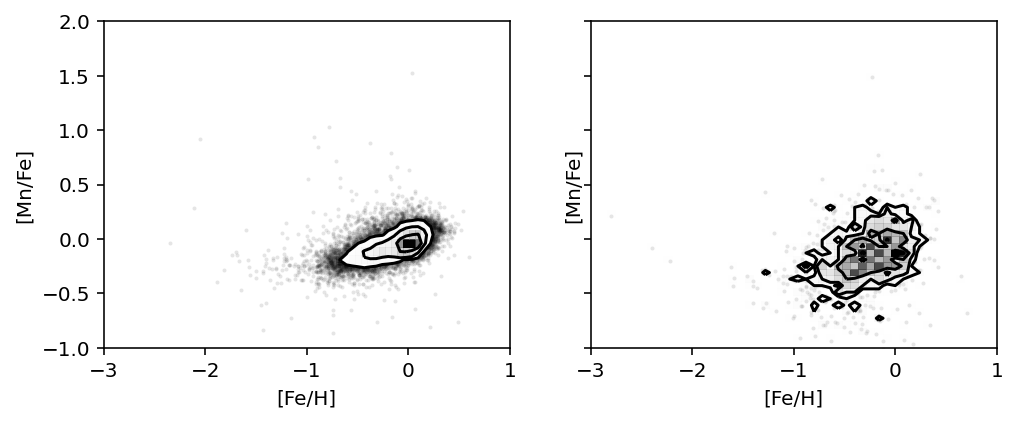

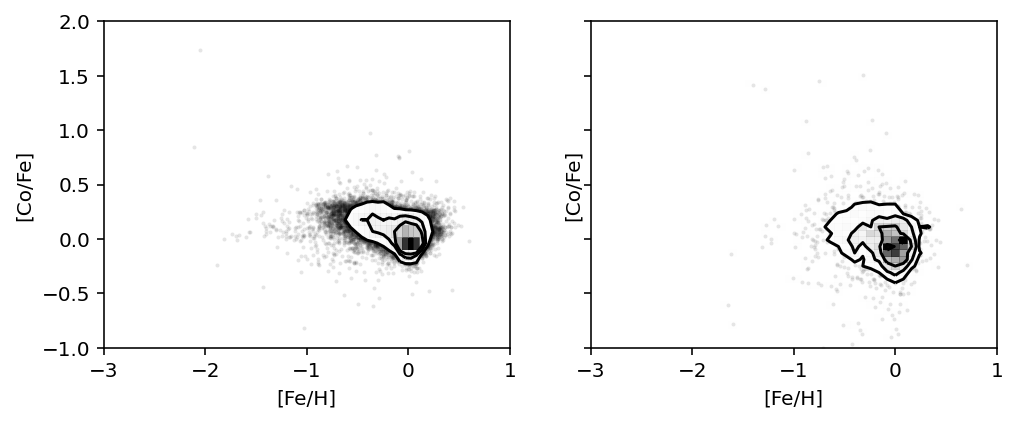

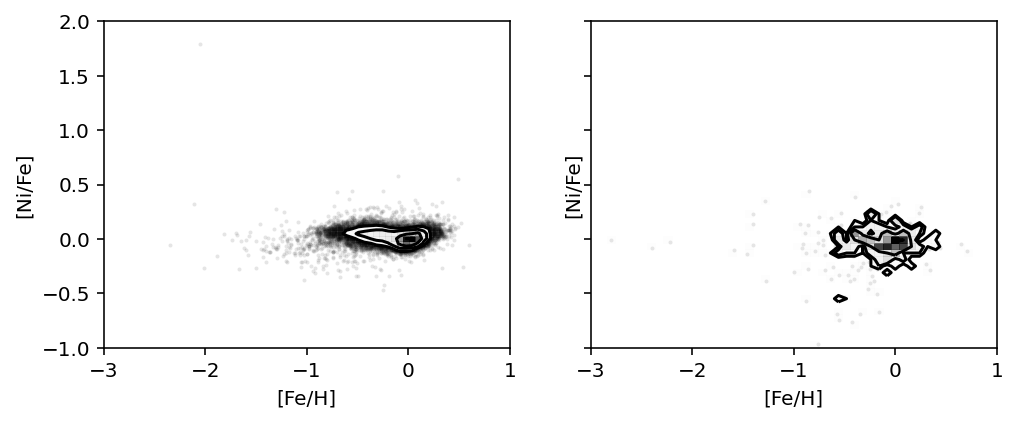

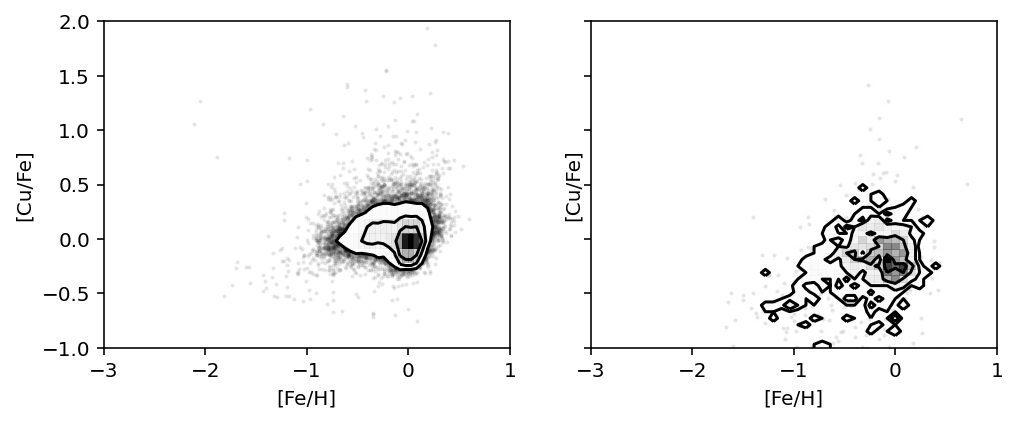

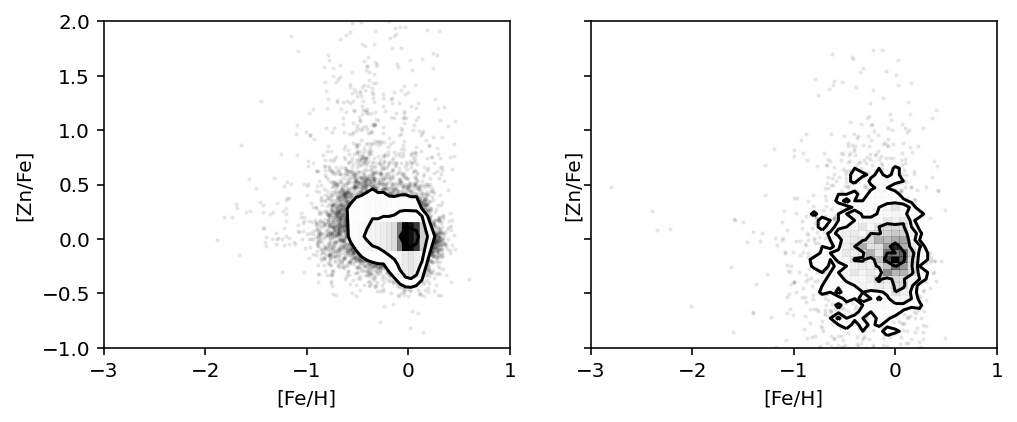

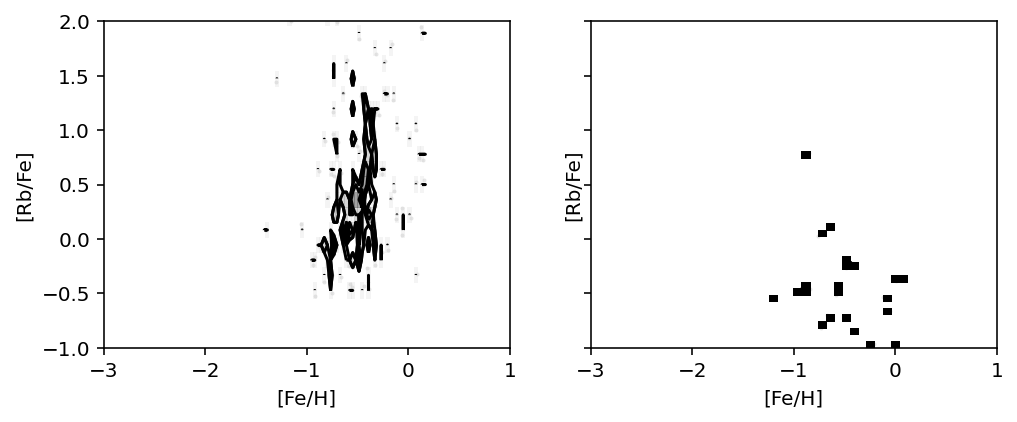

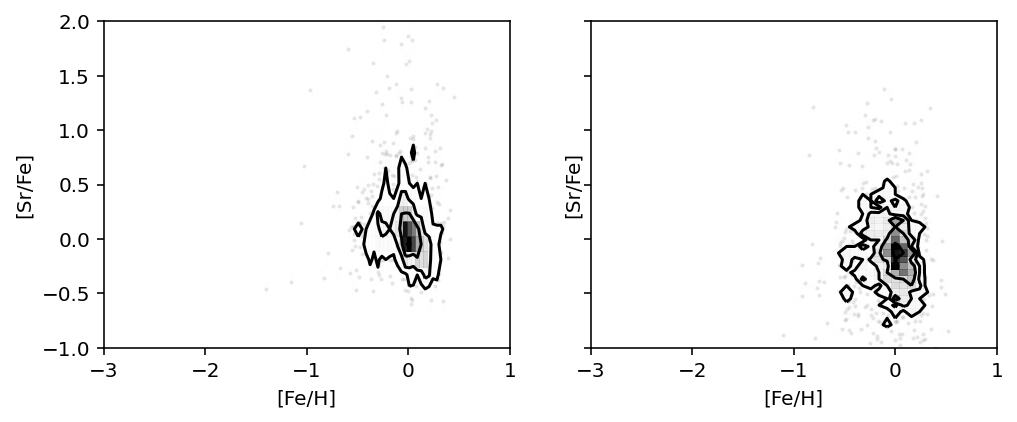

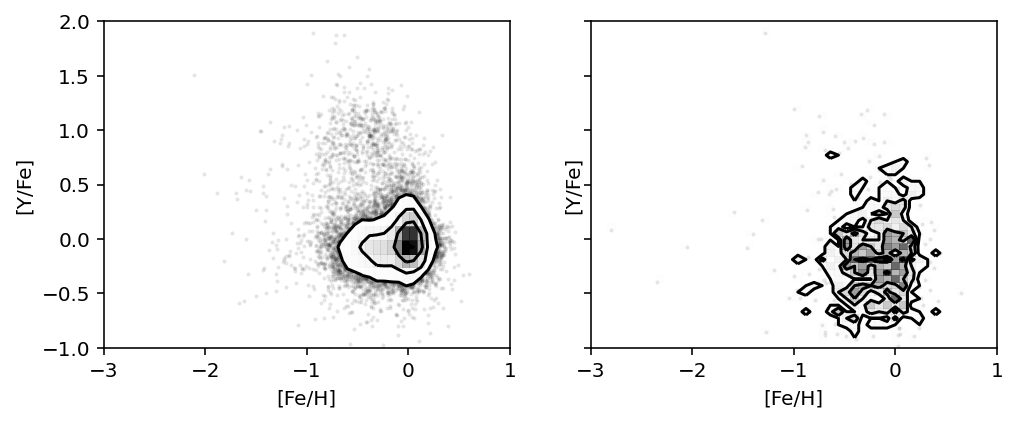

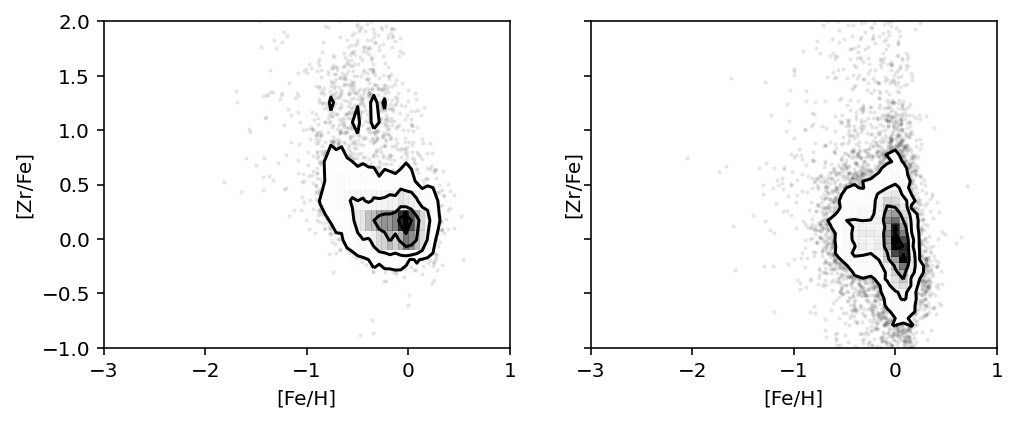

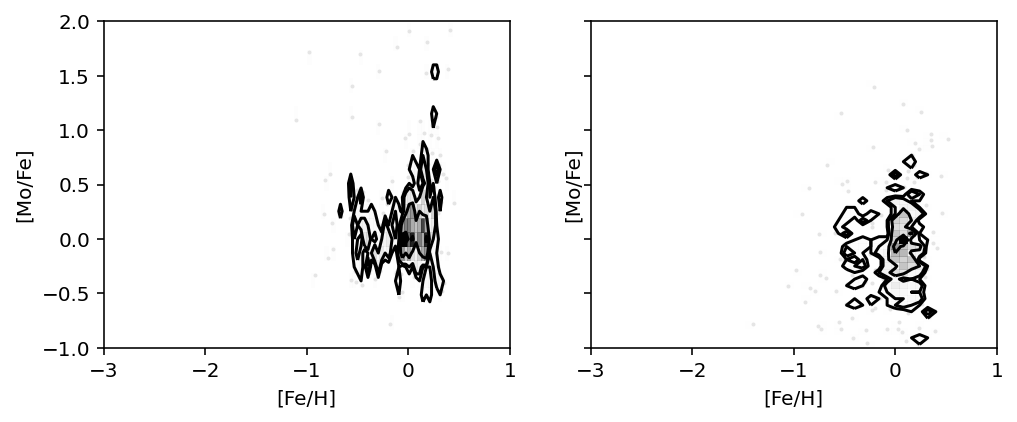

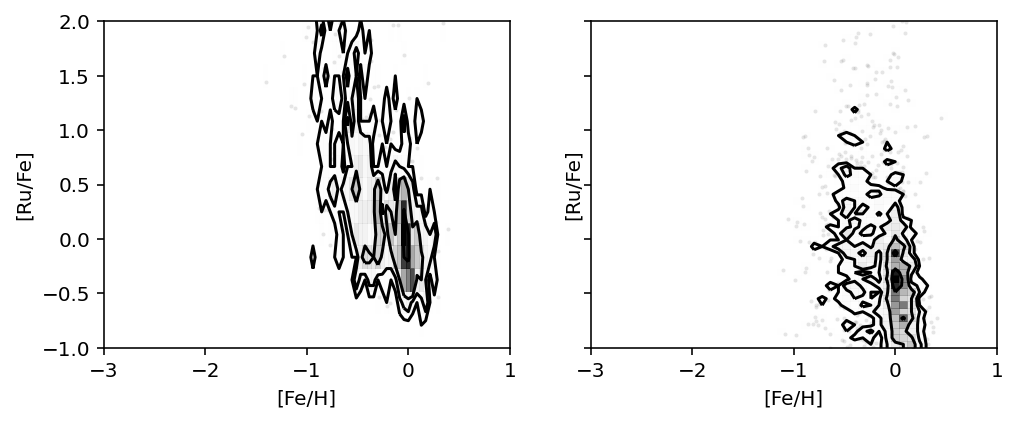

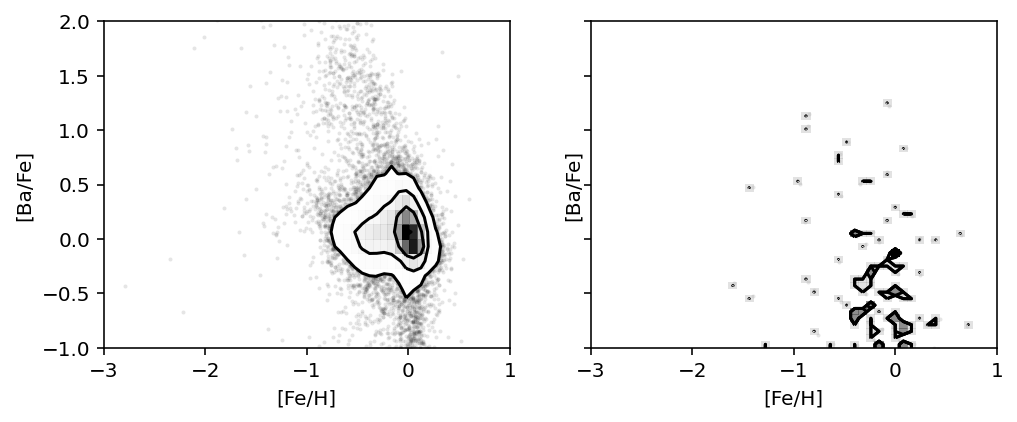

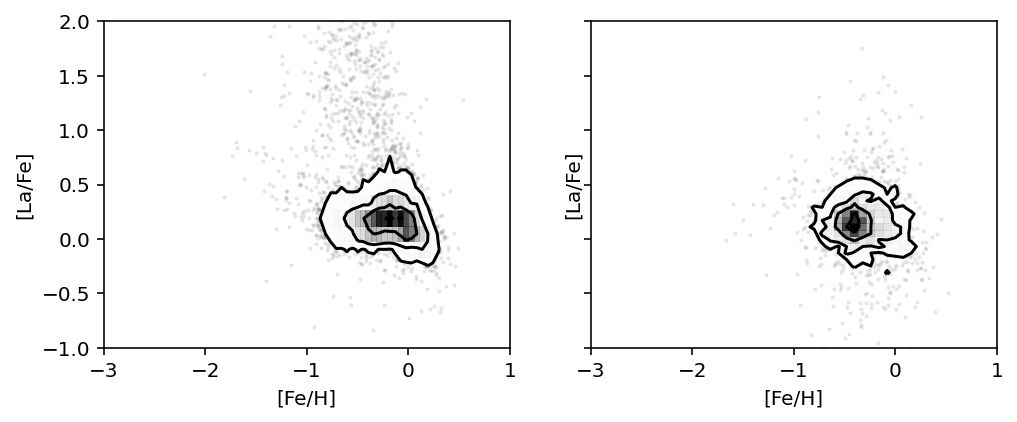

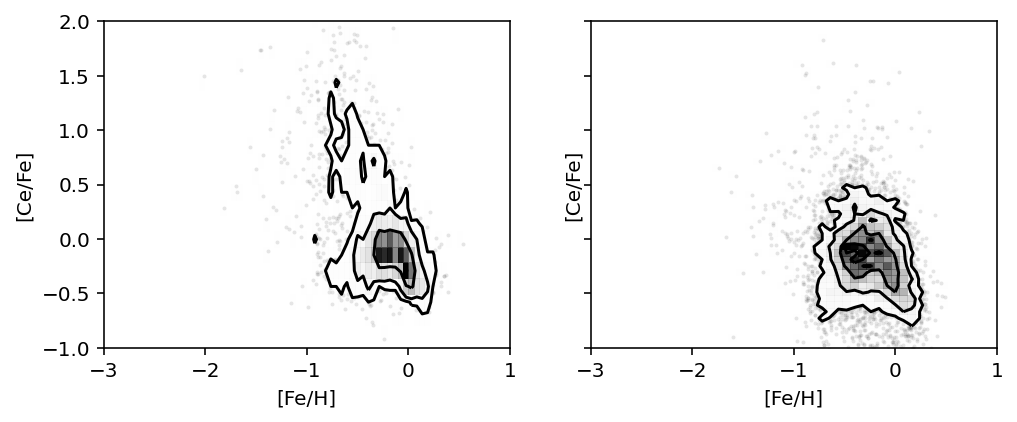

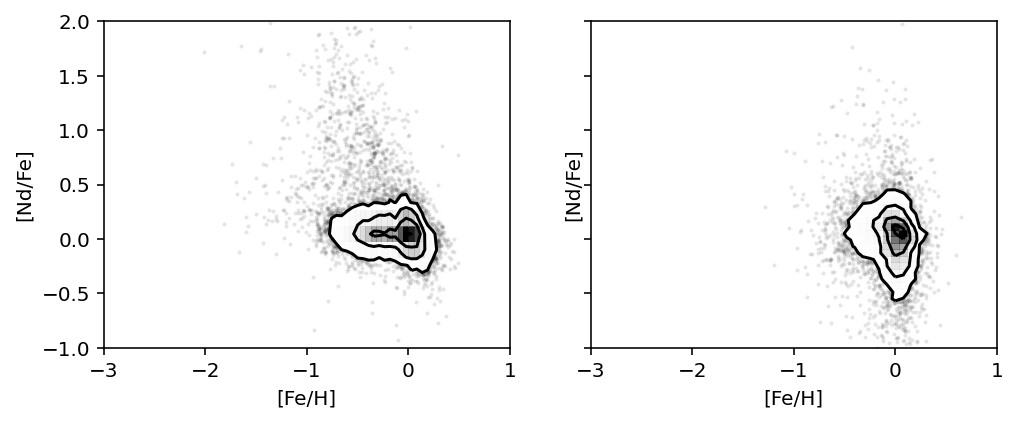

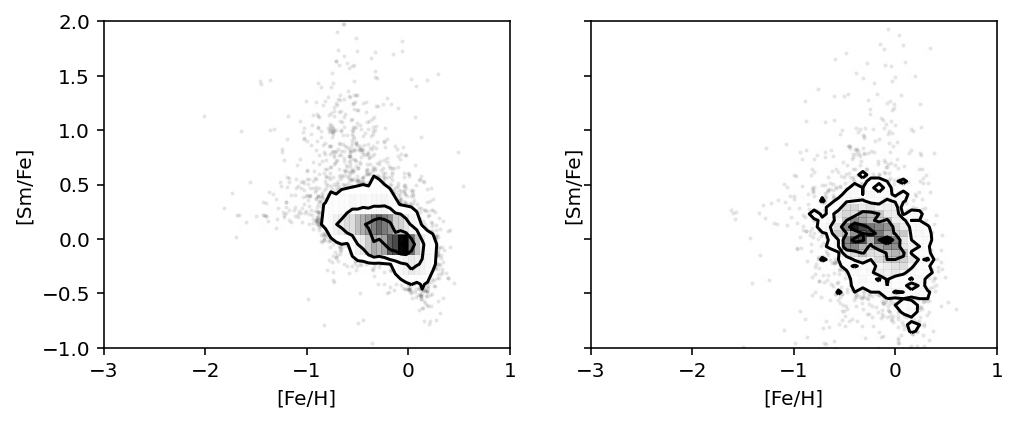

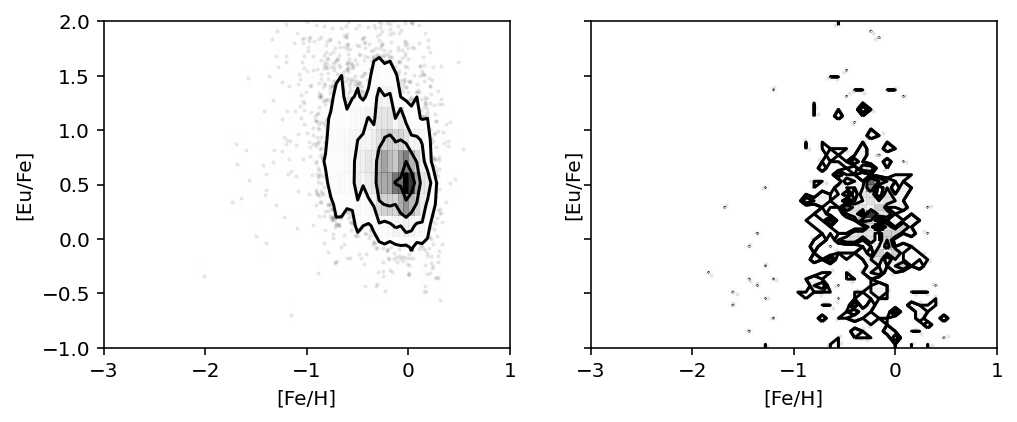

In [28]:
# Plot HRD & abundances 

flag0 = data['flag_sp'] == 0
flag1 = data['flag_sp'] > 0

if len(data) < 2000:
    plt.figure()
    plt.scatter(
        data['teff'][flag0],
        data['logg'][flag0],
        s=1
    )
    plt.scatter(
        data['teff'][flag1],
        data['logg'][flag1],
        marker='v',
        s=0.5
    )
    plt.xlabel('Teff / K')
    plt.ylabel('log (g / cm s-2)')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    plt.close()
else:
    plt.figure()
    plt.hist2d(
        data['teff'][flag0],
        data['logg'][flag0],
        bins=100,cmin=1,
        norm=LogNorm()
    )
#     plt.scatter(
#         data['teff'][flag1],
#         data['logg'][flag1],
#         marker='v',
#         s=0.5
#     )
    plt.xlabel('Teff / K')
    plt.ylabel('log (g / cm s-2)')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
    plt.close()

for label in [
    'Li',
    'C',
    'N',
    'O',
    'Na',
    'Mg',
    'Al',
    'Si',
    'K',
    'Ca',
    'Sc',
    'Ti',
    'V',
    'Cr',
    'Mn',
    'Co',
    'Ni',
    'Cu',
    'Zn',
    'Rb',
    'Sr',
    'Y',
    'Zr',
    'Mo',
    'Ru',
    'Ba',
    'La',
    'Ce',
    'Nd',
    'Sm',
    'Eu'
    ]:
    
    flag0 = (data['flag_'+label.lower()+'_fe'] == 0) #& (data['fe_h'] > -1)
    flag1 = (data['flag_'+label.lower()+'_fe'] == 1) #& (data['fe_h'] > -1)
    
    if len(data) < 2000:
        plt.figure()
        plt.scatter(
            data['fe_h'][flag0],
            data[label.lower()+'_fe'][flag0],
            s=1,label='Detection'
        )
        plt.scatter(
            data['fe_h'][flag1],
            data[label.lower()+'_fe'][flag1],
            marker='v',label='Upper limit',
            s=0.5
        )
        plt.legend()
        plt.xlabel('[Fe/H]')
        plt.ylabel('['+label+'/Fe]')
        plt.savefig('overview_'+label+'.png',dpi=200,bbox_inches='tight')
        plt.show()
        plt.close()
    
    else:
        f, gs = plt.subplots(1,2,figsize=(8,3),sharex=True,sharey=True)
        ax = gs[0]
        ax.set_xlabel('[Fe/H]')
        ax.set_ylabel('['+label+'/Fe]')
        corner.hist2d(
            data['fe_h'][flag0],
            data[label.lower()+'_fe'][flag0],
            ax = ax,bins=50
        )
        ax = gs[1]
        ax.set_xlabel('[Fe/H]')
        ax.set_ylabel('['+label+'/Fe]')
        corner.hist2d(
            data['fe_h'][flag1],
            data[label.lower()+'_fe'][flag1],
            ax = ax,bins=50,
            range = [(-3,1),(-1,2)]
        )
        ax.text
        plt.savefig('overview_'+label+'.png',dpi=200,bbox_inches='tight')
        plt.show()
        plt.close()

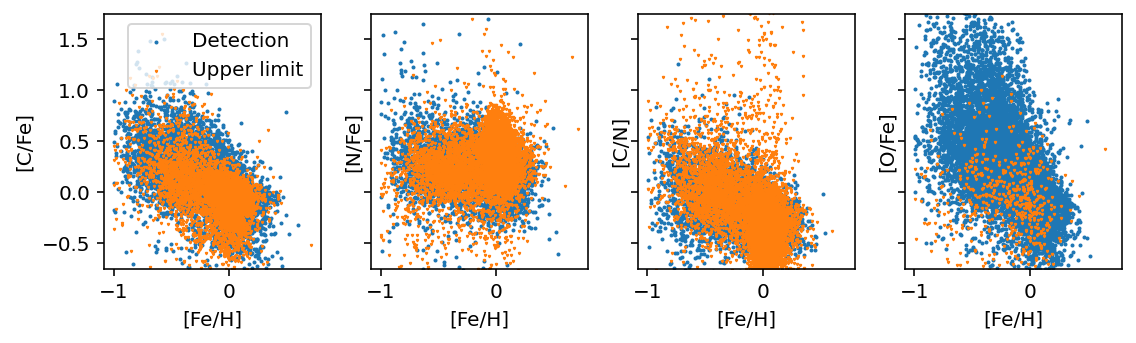

In [29]:
f, gs = plt.subplots(1,4,sharex=True,sharey=True,figsize=(2*4,2.5))

panels = ['a)','b)','c)','d)']

for i,label in enumerate(['C','N','CN','O']):
    ax = gs[i]

    if label in ['C','N','O']:
        flag0 = (data['flag_'+label.lower()+'_fe'] == 0) & (data['fe_h'] > -1)
        flag1 = (data['flag_'+label.lower()+'_fe'] == 1) & (data['fe_h'] > -1)
        ax.scatter(
            data['fe_h'][flag0],
            data[label.lower()+'_fe'][flag0],
            s=1,label='Detection'
        )
        ax.scatter(
            data['fe_h'][flag1],
            data[label.lower()+'_fe'][flag1],
            marker='v',label='Upper limit',
            s=0.5
        )
        
    if label == 'CN':
        flag0 = (data['flag_c_fe'] == 0) & (data['flag_n_fe'] == 0) & (data['fe_h'] > -1)
        flag1 = ((data['flag_c_fe'] == 1) | (data['flag_n_fe'] == 1)) & (data['fe_h'] > -1)
        ax.scatter(
            data['fe_h'][flag0],
            data['c_fe'][flag0]-data['n_fe'][flag0],
            s=1,label='Detection'
        )
        ax.scatter(
            data['fe_h'][flag1],
            data['c_fe'][flag1]-data['n_fe'][flag1],
            marker='v',label='Upper limit',
            s=0.5
        )
    
    ax.set_ylim(-0.75,1.75)
    
    if i==0:
        ax.legend()
    ax.set_xlabel('[Fe/H]')
    if label in ['C','N','O']:
        ax.set_ylabel('['+label+'/Fe]')
    if label == 'CN':
        ax.set_ylabel('[C/N]')
plt.tight_layout()
plt.savefig('overview_CNO.png',dpi=200,bbox_inches='tight')
plt.show()
plt.close()

In [30]:
# [X/Fe] = [X/H] - [M/H]
# [X/H] + (A_X - 12) = log(N_X/N_H) 
# [X/Fe] = log(N_X / N_H) - log(N_X / N_H)_Sun - [Fe/H]
# [C + N / Fe] = log((N_C + N_N) / N_H) - log((N_C_Sun + (N_N_Sun / N_H)_Sun - [Fe/H]
# [C + N / Fe] = log(N_C/N_H + N_N/N_H) - log(N_C_Sun/H_Sun + N_N_Sun/N_H_Sun) - [Fe/H]

A_N_Sun = 7.78+0.15
A_C_Sun = 8.39+0.037

A_C = data['c_fe'] + data['fe_h'] + (A_C_Sun)
A_N = data['n_fe'] + data['fe_h'] + (A_N_Sun)

N_C_N_H = 10**(A_C + 12)
N_N_N_H = 10**(A_N + 12)
N_C_N_H_sun = 10**(A_C_Sun + 12)
N_N_N_H_sun = 10**(A_N_Sun + 12)

data['cn_fe'] = np.log10(N_C_N_H + N_N_N_H) - np.log10(N_C_N_H_sun + N_N_N_H_sun) - data['fe_h']

In [31]:
def cn_masses(fe_h, c_fe, n_fe, cn_fe):
    return(
        1.08 - 0.18 * fe_h + 4.30 * c_fe +1.43 * n_fe - 7.55 * cn_fe
        - 1.05 * (fe_h)**2 - 1.12 * (fe_h * c_fe) - 0.67 * (fe_h * n_fe) - 1.30 * (fe_h * cn_fe)
        - 49.92 * (c_fe)**2 - 41.04 * (c_fe * n_fe) + 139.92 * (c_fe * cn_fe)
        - 0.63 * (n_fe)**2 + 47.33 * (n_fe * cn_fe)
        - 86.62 * (cn_fe)**2
    )
data['mass'] = cn_masses(fe_h=data['fe_h'], c_fe=data['c_fe'], n_fe=data['n_fe'], cn_fe=(data['cn_fe']-0.1)/2.)

In [32]:
def cn_ages(fe_h, c_fe, n_fe, cn_fe, teff, logg):
    return(
        -54.35 + 6.53*fe_h -19.02 *c_fe -12.18*n_fe +37.22*cn_fe +59.58*teff +16.14*logg
        +0.74*fe_h*fe_h +4.04*fe_h*c_fe +0.76*fe_h*n_fe -4.94*fe_h*cn_fe -1.46*fe_h*teff -1.56*fe_h*logg
        +26.90*c_fe*c_fe +13.33*c_fe*n_fe -77.84*c_fe*cn_fe +48.29*c_fe*teff -13.12*c_fe*logg
        -1.04*n_fe*n_fe -17.60*n_fe*cn_fe +13.99*n_fe*teff -1.77*n_fe*logg
        +51.24*cn_fe*cn_fe -65.67*cn_fe*teff +14.24*cn_fe*logg
        +15.54*teff*teff -34.68*teff*logg
        +4.17*logg*logg
    )
data['age'] = 10**(cn_ages(fe_h=data['fe_h'], c_fe=data['c_fe'], n_fe=data['n_fe'], cn_fe=data['cn_fe'], teff=data['teff']/4000., logg=data['logg']))

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in power
  # This is added back by InteractiveShellApp.init_path()


In [33]:
def hist2d_bin_colored(X,Y,Z,X_label='X\_label',Y_label='Y\_label',Z_label='Z\_label',bins=30,bin_function='median',ax=None,cmap='seismic_r',minimum_bin_entries = 5,**kwargs):
    """
    INPUT:
    X : x-axis parameter
    Y : y-axis parameter
    Z : parameter that will be used for coloring the bins
    X/Y/Z_label : label names
    bins = 30, but you can also give it bins = (np.linspace(x_min,x_max,30),np.linspace(y_min,y_max,30))
    bin_function : median/average/sum
    ax : if you plot it as part of an f,ax = plt.subplots()
    minimum_bin_entries : how many entries do we expect, before we even consider throwing some fancy function at them
    
    OUTPUT:
    plt.imshow
    """
    
    # First make sure we only work with finite values
    finite = np.isfinite(X) & np.isfinite(Y) & np.isfinite(Z)
    if len(X[finite])!=len(X):
        print('Not all values were finite! Continuing with only finite ones')
    X=X[finite];Y=Y[finite];Z=Z[finite]
    
    # Now create the matrix of bins and its bin-edges
    H,xedges,yedges = np.histogram2d(X,Y,bins=bins)

    # Create the matrix that we want to store color-values in
    color_matrix = np.zeros_like(H)
    color_matrix[:] = np.nan
    
    # Loop through the x- and y-bins
    for x_bin in range(len(xedges)-1):
        for y_bin in range(len(yedges)-1):
            in_xy_bin = (X>=xedges[x_bin])&(X<xedges[x_bin+1])&(Y>=yedges[y_bin])&(Y<yedges[y_bin+1])
            
            # We only add a value if there are more than *minimum_bin_entries* in the bin
            if len(Z[in_xy_bin]) >= minimum_bin_entries:
                if bin_function=='median':
                    color_matrix[x_bin,y_bin]=np.median(Z[in_xy_bin])
                elif bin_function=='average':
                    color_matrix[x_bin,y_bin]=np.average(Z[in_xy_bin])
                elif bin_function=='sum':
                    color_matrix[x_bin,y_bin]=np.sum(Z[in_xy_bin])
                elif bin_function=='std':
                    color_matrix[x_bin,y_bin]=np.std(Z[in_xy_bin])
                else:
                    raise NameError('Only bin_function = median/average/sum available')

    # Create an axis if not given
    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
    ax.set_xlabel(X_label)
    ax.set_ylabel(Y_label)

    # Populate the keyword arguments for the imshow
    imshow_kwargs = dict(
        cmap = cmap,aspect='auto',origin='lower'
    )
    # Update by any arguments given through **kwargs
    imshow_kwargs.update(kwargs)

    # Plot!
    s = ax.imshow(color_matrix.T,extent=(xedges[0],xedges[-1],yedges[0],yedges[-1]),**imshow_kwargs)
    c = plt.colorbar(s, ax=ax)
    c.set_label(Z_label)

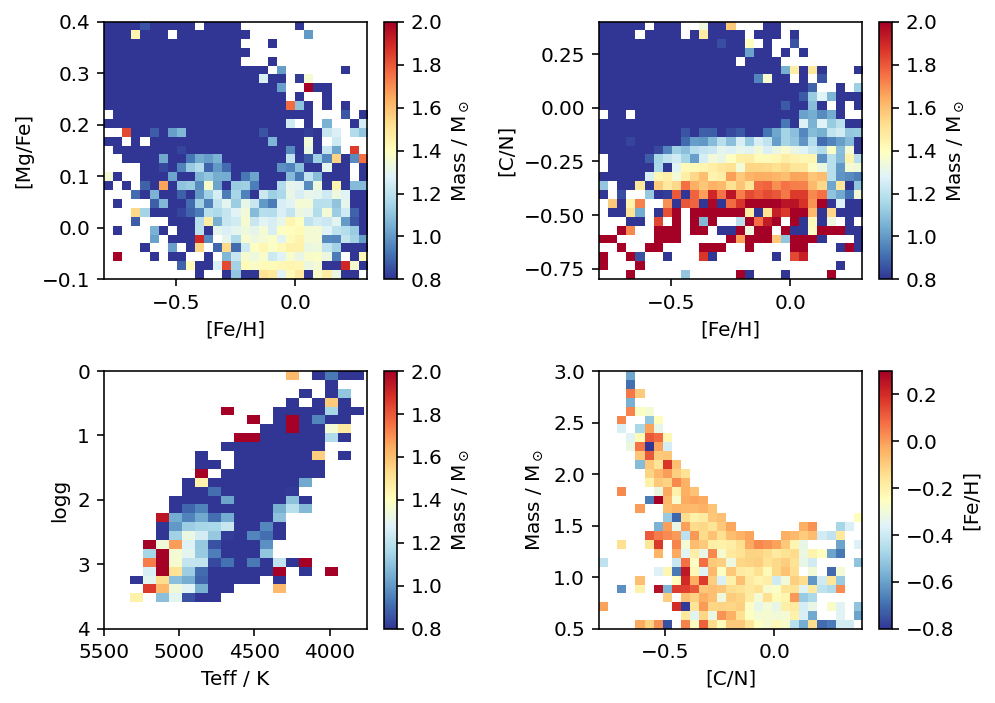

In [34]:
giants = (data['logg'] < 3.5) & (data['flag_c_fe'] == 0) & (data['flag_n_fe'] == 0)

f, gs = plt.subplots(2,2,figsize=(7,5))
hist2d_bin_colored(
    data['fe_h'][giants],
    data['mg_fe'][giants],
    data['mass'][giants],
    X_label='[Fe/H]',
    Y_label='[Mg/Fe]',
    Z_label=r'Mass / $\mathrm{M}_\odot$',
    ax = gs[0,0],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.1,0.4,30)),
    vmin = 0.8, vmax = 2.0,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['fe_h'][giants],
    data['c_fe'][giants]-data['n_fe'][giants],
    data['mass'][giants],
    X_label='[Fe/H]',
    Y_label='[C/N]',
    Z_label=r'Mass / $\mathrm{M}_\odot$',
    ax = gs[0,1],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.8,0.4,30)),
    vmin = 0.8, vmax = 2.0,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['teff'][giants],
    data['logg'][giants],
    data['mass'][giants],
    X_label='Teff / K',
    Y_label='logg',
    Z_label=r'Mass / $\mathrm{M}_\odot$',
    ax = gs[1,0],
    bins = (np.linspace(3000,5500,30),np.linspace(0,4,30)),
    vmin = 0.8, vmax = 2.0,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
gs[1,0].set_xlim(5500,3750)
gs[1,0].set_ylim(4,0)
hist2d_bin_colored(
    data['c_fe'][giants]-data['n_fe'][giants],
    data['mass'][giants],
    data['fe_h'][giants],
    X_label='[C/N]',
    Y_label=r'Mass / $\mathrm{M}_\odot$',
    Z_label='[Fe/H]',
    ax = gs[1,1],
    bins = (np.linspace(-0.8,0.4,30),np.linspace(0.5,3.0,30)),
    vmin = -0.8, vmax = 0.3,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
plt.tight_layout()

Not all values were finite! Continuing with only finite ones
Not all values were finite! Continuing with only finite ones
Not all values were finite! Continuing with only finite ones
Not all values were finite! Continuing with only finite ones


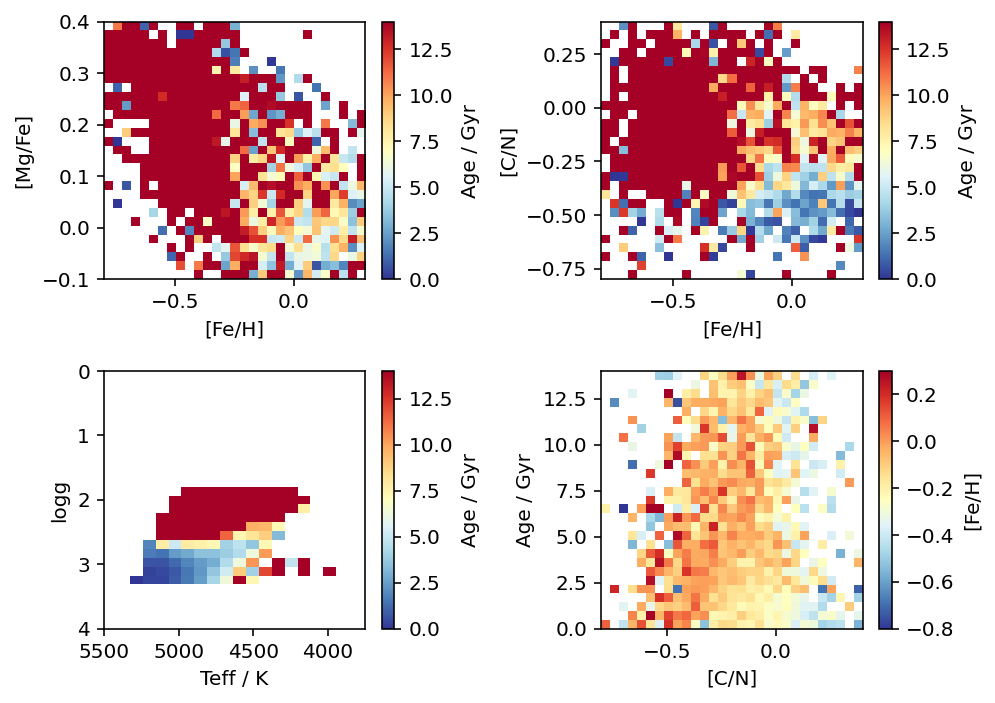

In [35]:
giants = (data['logg'] > 1.8) & (data['logg'] < 3.3) & (data['flag_c_fe'] == 0) & (data['flag_n_fe'] == 0)

f, gs = plt.subplots(2,2,figsize=(7,5))
hist2d_bin_colored(
    data['fe_h'][giants],
    data['mg_fe'][giants],
    data['age'][giants],
    X_label='[Fe/H]',
    Y_label='[Mg/Fe]',
    Z_label=r'Age / Gyr',
    ax = gs[0,0],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.1,0.4,30)),
    vmin = 0, vmax = 14,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['fe_h'][giants],
    data['c_fe'][giants]-data['n_fe'][giants],
    data['age'][giants],
    X_label='[Fe/H]',
    Y_label='[C/N]',
    Z_label=r'Age / Gyr',
    ax = gs[0,1],
    bins = (np.linspace(-0.8,0.3,30),np.linspace(-0.8,0.4,30)),
    vmin = 0, vmax = 14,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
hist2d_bin_colored(
    data['teff'][giants],
    data['logg'][giants],
    data['age'][giants],
    X_label='Teff / K',
    Y_label='logg',
    Z_label=r'Age / Gyr',
    ax = gs[1,0],
    bins = (np.linspace(3000,5500,30),np.linspace(0,4,30)),
    vmin = 0, vmax = 14,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
gs[1,0].set_xlim(5500,3750)
gs[1,0].set_ylim(4,0)
hist2d_bin_colored(
    data['c_fe'][giants]-data['n_fe'][giants],
    data['age'][giants],
    data['fe_h'][giants],
    X_label='[C/N]',
    Y_label=r'Age / Gyr',
    Z_label='[Fe/H]',
    ax = gs[1,1],
    bins = (np.linspace(-0.8,0.4,30),np.linspace(0,14,30)),
    vmin = -0.8, vmax = 0.3,
    cmap = 'RdYlBu_r',
    minimum_bin_entries = 1
)
plt.tight_layout()